# Prueba Intertrimestral

**Nombre:Ignacio**
**Apellidos: Sanz Barro** 

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    silhouette_score
)

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [2]:
#La height la pones en metro
def imc(weight, height):
    if height <= 0:
        print("La alturra tiene que ser mayor que 0")
    bmi = weight / (height ** 2)
    return round(bmi, 2)
    

In [4]:
imc(70,1.75)

22.86

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [5]:
def saludable(imcValue):
    if (imcValue < 18.5):
        print("Bajo Peso")
    elif (imcValue > 24.9):
        print("Sobrepeso")
    else:
        print("Saludable")
    

In [8]:
saludable(28)

Sobrepeso


c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [14]:
peso = np.random.uniform(50, 100, 10).round(1)
altura = np.random.uniform(1.5, 2.0, 10).round(2)

imc_values = [imc(p, h) for p, h in zip(peso, altura)]
categoria = [saludable(i) for i in imc_values]

imcData = pd.DataFrame({
    'peso': peso,
    'altura': altura,
    'imc': imc_values,
    'categoria': categoria})

print(imcData.head())
print("\nTipos de datos:\n", imcData.dtypes)

Sobrepeso
Sobrepeso
Sobrepeso
Sobrepeso
Bajo Peso
Sobrepeso
Sobrepeso
Saludable
Saludable
Saludable
   peso  altura    imc categoria
0  85.7    1.56  35.22      None
1  98.5    1.83  29.41      None
2  92.9    1.90  25.73      None
3  88.2    1.51  38.68      None
4  59.3    1.84  17.52      None

Tipos de datos:
 peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [19]:
lifeStyleData= pd.read_csv("Final_data.csv")
lifeStyleData.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [20]:
lifeStyleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         19999 non-null  float64
 5   Avg_BPM                         19999 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [21]:
#Podemos observar como hay 53 columnas y 20000 entadas (filas)

b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [26]:
def describeData(dataFrame):
    resumen = pd.DataFrame({
        'Tipo de Dato': dataFrame.dtypes,
        'Num ValoresNulos': dataFrame.isnull().sum(),
        'Porcentaje Nulos (%)': (dataFrame.isnull().mean() * 100).round(5)
    })
    return resumen

In [27]:
describeData(lifeStyleData)

,Tipo de Dato,Num ValoresNulos,Porcentaje Nulos (%)
Age,float64,0,0.000
Gender,object,0,0.000
Weight (kg),float64,0,0.000
Height (m),float64,0,0.000
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
Resting_BPM,float64,0,0.000
Session_Duration (hours),float64,0,0.000
Calories_Burned,float64,0,0.000
Workout_Type,object,0,0.000


c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [28]:
describeData(lifeStyleData)

,Tipo de Dato,Num ValoresNulos,Porcentaje Nulos (%)
Age,float64,0,0.000
Gender,object,0,0.000
Weight (kg),float64,0,0.000
Height (m),float64,0,0.000
Max_BPM,float64,1,0.005
Avg_BPM,float64,1,0.005
Resting_BPM,float64,0,0.000
Session_Duration (hours),float64,0,0.000
Calories_Burned,float64,0,0.000
Workout_Type,object,0,0.000


Como se puede apreciar en la tabla anterior, observamos como el dataset estaba ya casi entero limpio unicamente con un tres variables de todo el dataset con un valor nulo (Max_BPM, Avg_BPM, cholesterol_mg). Debido a que el total de entradas es de 20000, el % de valores nulos en estas tres variables es de 0,005% lo que lo hace un valor muy insignificativo

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

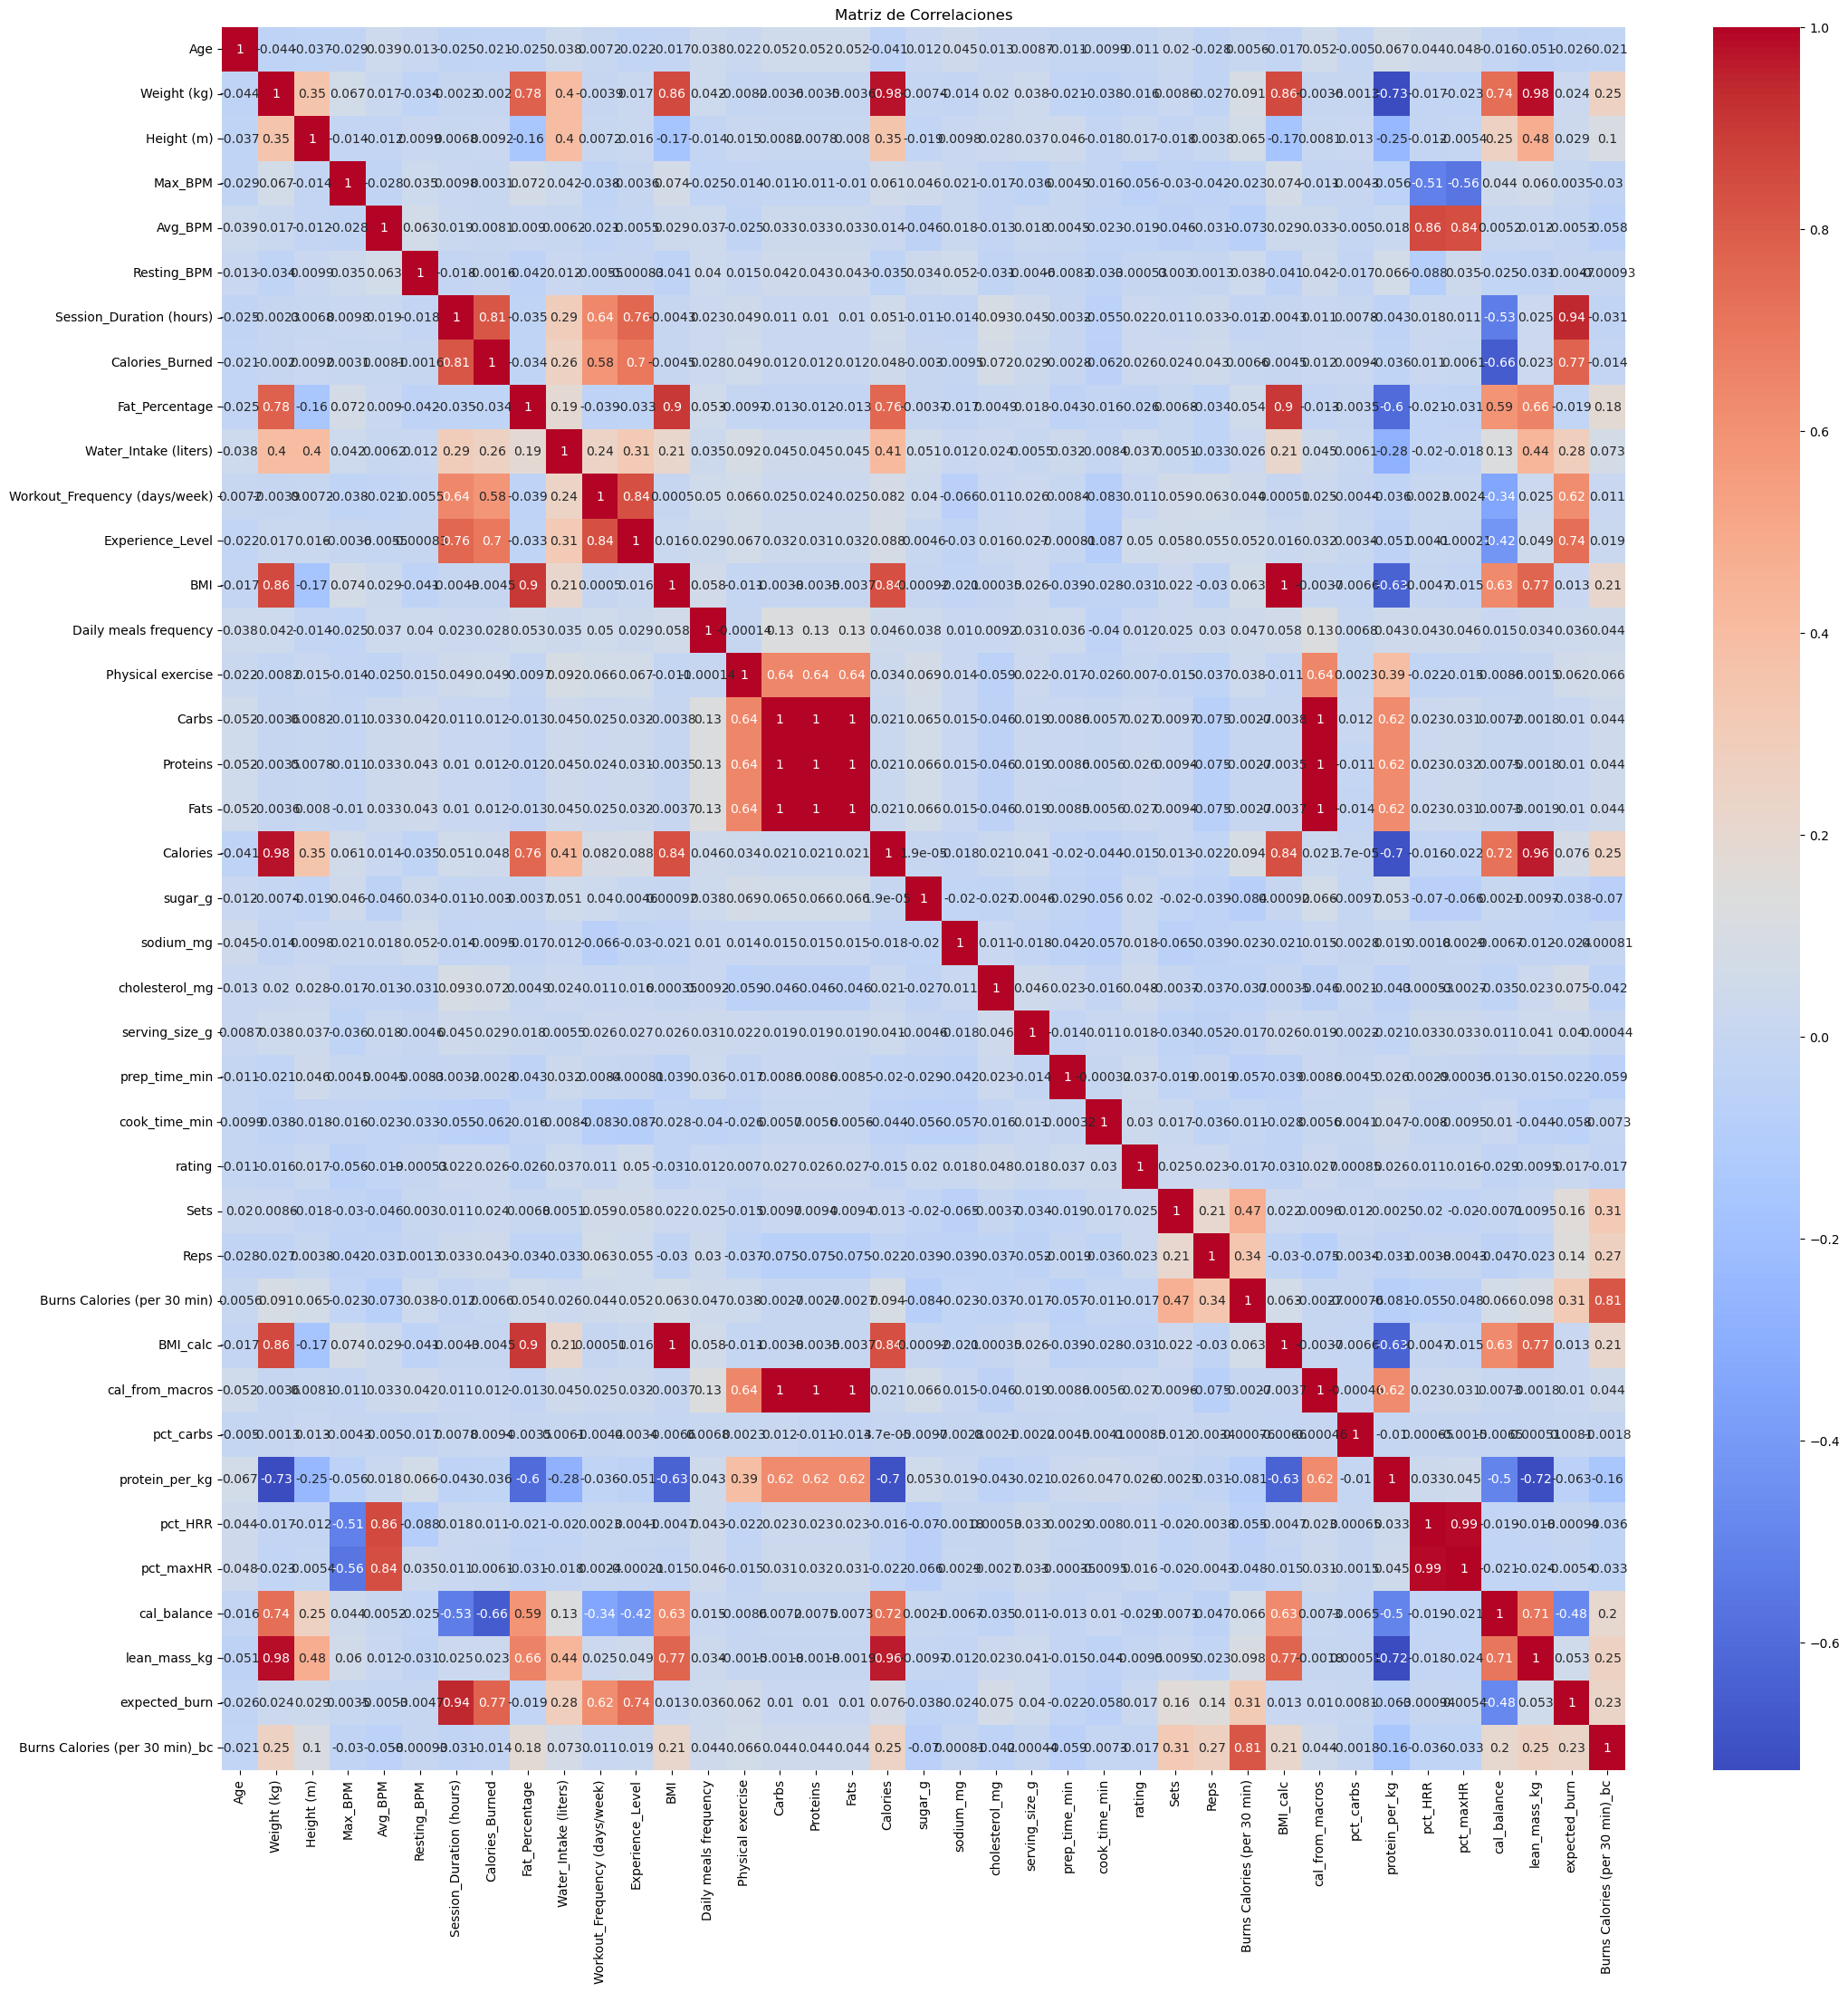

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = lifeStyleData.corr(numeric_only=True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlaciones")
plt.show()

Podemos observar en el grafico de arriba como hay varias correlaciones tanto directa como inversa. Podemos decir que existe una fuerte relacion cuando el valor de este es >= |0.7|. Si es negativo es relacion fuerte inversa y relacion fuerte directa si es positiva. Si nos vamos a la variable Fat_porcentage podemos decir que hay una fuerte relacion con BMI y weight lo cual tiene mucho sentido ya que la gente alta suele tener mmenor % de grasa y si tiene un BMI bajo sueles estar mas delgado (menos grasa)

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [65]:
targetVar= lifeStyleData["BMI"]
X= lifeStyleData[["Calories","Fat_Percentage"]]
y= targetVar


b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Con el modelo de regresion lineal el: R² = {r2:.4f} | MSE = {mse:,.2f}")

Con el modelo de regresion lineal el: R² = 0.8691 | MSE = 5.99


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [69]:
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train, y_train)

rfry_pred = rfr.predict(X_test)

rfrr2 = r2_score(y_test, rfry_pred)
rfrmse = mean_squared_error(y_test, rfry_pred)

print(f"Con el modelo de random forest el: R² = {rfrr2:.4f} | MSE = {rfrmse:,.2f}")

Con el modelo de random forest el: R² = 0.8709 | MSE = 5.90


Como podemos observar, si usamos las mismas variables en dos modelos distintos obtenemos distintos resultados. En este casoel mejor modelo es el random Forest Regressor ya que tiene un R^2 mayor (0.8709>0.8691) y un Error cuadratico Medio menor (5.9<5.99)

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [ ]:
#Supongo que tengo la variable bmiHealthy. no me daba tiempo y estos ejs estaban ya
targetVarsec= lifeStyleData["bmiHealthy"]
X= lifeStyleData[["Calories","Fat_Percentage"]]
y= targetVarsec
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [ ]:
print("La exacitud es de \n",accuracy_score(y_test, y_pred))
print("Matriz de confusion es de \n", confusion_matrix(y_test, y_pred))


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.

